In [1]:
!pip install pandas
!pip install numpy
!pip install pycaret
import pandas as pd
import numpy as np 
from pycaret.classification import *

In [24]:
Train = pd.read_csv('/home/jovyan/Train_clean.csv')
Test = pd.read_csv('/home/jovyan/Test_value_clean.csv')

In [25]:
Train = Train.drop(Train.columns[[0,1]],axis=1)
Test = Test.drop(Test.columns[[0,1]],axis=1)

In [26]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59400 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [27]:
Test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0.0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0.0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,Government Of Tanzania,1567,DWE,34.767863,-5.004344,Puma Secondary,0.0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0.0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,62.5,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0.0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [28]:
#Train = Train.drop(columns=['wpt_name','num_private','ward','recorded_by','scheme_name','extraction_type','extraction_type_group','management','payment','water_quality','quantity','source','waterpoint_type'])

In [29]:
#Test = Test.drop(columns=['wpt_name','num_private','ward','recorded_by','scheme_name','extraction_type','extraction_type_group','management','payment','water_quality','quantity','source','waterpoint_type'])

In [30]:
#Train = Train[['quantity_group','waterpoint_type_group','extraction_type_class','population','construction_year','funder','payment_type','source_type','gps_height',"status_group"]]
#Test = Test[['quantity_group','waterpoint_type_group','extraction_type_class','population','construction_year','funder','payment_type','source_type','gps_height']]      
Train = Train[['id','quantity','construction_year','ward','waterpoint_type','funder','lga','subvillage','gps_height',"status_group"]]
Test = Test[['id','quantity','construction_year','ward','waterpoint_type','funder','lga','subvillage','gps_height']]


In [31]:
# Function to set up # of category for features
test_cat = 20
def max_cat(col):
    if len(Train[col].value_counts()) > (test_cat):
        top_value = Train[col].value_counts()[:(test_cat)].index.tolist()
        Train.loc[-Train[col].isin(top_value),col]='Others'
                
    return Train

def max_cat_test(col):
    if len(Test[col].value_counts()) > (test_cat):
        top_value = Test[col].value_counts()[:(test_cat)].index.tolist()
        Test.loc[-Test[col].isin(top_value),col]='Others'
                
    return Test

In [32]:
Train.describe(include=[np.object,np.int64])

,id,quantity,construction_year,ward,waterpoint_type,funder,lga,subvillage,gps_height,status_group
count,59400.000000,59400,59400.000000,59400,59400,59400,59400,59400,59400.000000,59400
unique,NaN,5,NaN,2092,7,1890,125,19284,NaN,3
top,NaN,enough,NaN,Igosi,communal standpipe,Government Of Tanzania,Njombe,Madukani,NaN,functional
freq,NaN,33186,NaN,307,28522,12719,2503,879,NaN,32259
mean,37115.131768,NaN,1996.191162,NaN,NaN,NaN,NaN,NaN,668.297239,NaN
std,21453.128371,NaN,10.291877,NaN,NaN,NaN,NaN,NaN,693.116350,NaN
min,0.000000,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN,-90.000000,NaN
25%,18519.750000,NaN,1989.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,37061.500000,NaN,1997.000000,NaN,NaN,NaN,NaN,NaN,369.000000,NaN
75%,55656.500000,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,1319.250000,NaN


In [33]:
Test.describe(include=[np.object,np.int64])

,id,quantity,construction_year,ward,waterpoint_type,funder,lga,subvillage,gps_height
count,14850.000000,14850,14850.000000,14850,14850,14850,14850,14850,14850.000000
unique,NaN,5,NaN,1959,7,976,125,8440,NaN
top,NaN,enough,NaN,Igosi,communal standpipe,Government Of Tanzania,Njombe,Shuleni,NaN
freq,NaN,8336,NaN,79,7106,3084,625,239,NaN
mean,37161.972929,NaN,1996.402222,NaN,NaN,NaN,NaN,NaN,655.147609
std,21359.364833,NaN,10.029187,NaN,NaN,NaN,NaN,NaN,691.261185
min,10.000000,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN,-57.000000
25%,18727.000000,NaN,1991.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,37361.500000,NaN,1997.000000,NaN,NaN,NaN,NaN,NaN,344.000000
75%,55799.750000,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,1308.000000


In [34]:
max_cat('ward')
max_cat('funder')
max_cat('subvillage')

max_cat_test('ward')
max_cat_test('funder')
max_cat_test('subvillage')




,id,quantity,construction_year,ward,waterpoint_type,funder,lga,subvillage,gps_height
0,50785,seasonal,2012,Others,other,Others,Mbulu,Others,1996
1,51630,insufficient,2000,Others,communal standpipe,Government Of Tanzania,Arusha Rural,Others,1569
2,17168,insufficient,2010,Others,other,Government Of Tanzania,Singida Rural,Others,1567
3,45559,dry,1987,Others,other,Others,Liwale,Others,267
4,49871,enough,2000,Others,communal standpipe,Others,Mbinga,Others,1260
...,...,...,...,...,...,...,...,...,...
14845,39307,enough,1988,Others,communal standpipe,Danida,Bagamoyo,Others,34
14846,18990,insufficient,1994,Others,hand pump,Others,Kilindi,Others,0
14847,28749,insufficient,2010,Others,communal standpipe,Government Of Tanzania,Singida Rural,Others,1476
14848,33492,insufficient,2009,Others,communal standpipe,Others,Songea Rural,Others,998


In [20]:
#Train_data = Train.iloc[:3000:,:]

In [37]:
Train.info()
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 59400 non-null  int64 
 1   quantity           59400 non-null  object
 2   construction_year  59400 non-null  int64 
 3   ward               59400 non-null  object
 4   waterpoint_type    59400 non-null  object
 5   funder             59400 non-null  object
 6   lga                59400 non-null  object
 7   subvillage         59400 non-null  object
 8   gps_height         59400 non-null  int64 
 9   status_group       59400 non-null  object
dtypes: int64(3), object(7)
memory usage: 4.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 14850 non-null  int64 
 1   quantity           1485

In [35]:
clf1 = setup(Train, target = 'status_group', session_id=123, log_experiment=True, experiment_name='pump')

,Description,Value
0,session_id,123
1,Target,status_group
2,Target Type,Multiclass
3,Label Encoded,"functional: 0, functional needs repair: 1, non functional: 2"
4,Original Data,"(59400, 10)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [36]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7551,0.8634,0.5617,0.7542,0.7339,0.5197,0.5402,4.3240
rf,Random Forest Classifier,0.7416,0.8492,0.5956,0.7321,0.7354,0.5193,0.5207,12.6090
et,Extra Trees Classifier,0.7343,0.8279,0.6001,0.7283,0.7307,0.5106,0.5112,16.2850
gbc,Gradient Boosting Classifier,0.7337,0.8305,0.5313,0.7456,0.7059,0.4682,0.5038,44.8790
ridge,Ridge Classifier,0.7266,0.0000,0.5153,0.7176,0.6977,0.4588,0.4796,0.6310
lda,Linear Discriminant Analysis,0.7187,0.8264,0.5584,0.7164,0.7051,0.4594,0.4740,4.7650
ada,Ada Boost Classifier,0.7149,0.7782,0.5168,0.7067,0.6892,0.4372,0.4582,3.4910
dt,Decision Tree Classifier,0.6961,0.7292,0.5763,0.6966,0.6964,0.4491,0.4491,1.1170
nb,Naive Bayes,0.6615,0.7451,0.4468,0.6272,0.6172,0.3103,0.3473,0.1520
lr,Logistic Regression,0.5836,0.6130,0.3740,0.3948,0.4628,0.1068,0.1091,9.6600


In [38]:
rf = create_model('rf') #0.7416

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7436,0.8473,0.5985,0.7337,0.7372,0.5228,0.5241
1,0.7422,0.8544,0.5904,0.7309,0.7346,0.5184,0.5201
2,0.7434,0.8453,0.5998,0.7350,0.7377,0.5229,0.5244
3,0.7410,0.8423,0.5920,0.7316,0.7344,0.5167,0.5188
4,0.7480,0.8625,0.5984,0.7375,0.7413,0.5310,0.5322
5,0.7508,0.8575,0.5984,0.7398,0.7432,0.5343,0.5362
6,0.7369,0.8455,0.5863,0.7274,0.7307,0.5105,0.5121
7,0.7321,0.8415,0.5818,0.7225,0.7258,0.5014,0.5031
8,0.7400,0.8432,0.5991,0.7316,0.7350,0.5192,0.5199
9,0.7376,0.8523,0.6107,0.7315,0.7338,0.5155,0.5161


In [39]:
et = create_model('et') #0.7343

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7297,0.8279,0.5946,0.7231,0.7260,0.5023,0.5027
1,0.7376,0.8305,0.6035,0.7301,0.7331,0.5149,0.5156
2,0.7333,0.8263,0.6053,0.7287,0.7306,0.5099,0.5103
3,0.7340,0.8197,0.5955,0.7280,0.7300,0.5083,0.5094
4,0.7400,0.8408,0.5988,0.7324,0.7357,0.5209,0.5212
5,0.7443,0.8348,0.6081,0.7375,0.7399,0.5269,0.5279
6,0.7282,0.8275,0.5855,0.7213,0.7241,0.4983,0.4990
7,0.7273,0.8205,0.5887,0.7207,0.7232,0.4965,0.4973
8,0.7338,0.8198,0.6024,0.7286,0.7309,0.5119,0.5121
9,0.7351,0.8310,0.6183,0.7327,0.7338,0.5159,0.5161


In [40]:
lightgbm = create_model('lightgbm') #0.7551

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7549,0.8591,0.5621,0.7549,0.7340,0.5192,0.5399
1,0.7578,0.8665,0.5571,0.7566,0.7350,0.5240,0.5447
2,0.7593,0.8646,0.5765,0.7615,0.7406,0.5294,0.5488
3,0.7468,0.8566,0.5583,0.7463,0.7261,0.5031,0.5256
4,0.7629,0.8689,0.5613,0.7586,0.7404,0.5349,0.5542
5,0.7557,0.8703,0.5587,0.7546,0.7336,0.5201,0.5413
6,0.7547,0.8610,0.5589,0.7530,0.7331,0.5181,0.5413
7,0.7475,0.8571,0.5556,0.7433,0.7264,0.5055,0.5247
8,0.7523,0.8599,0.5606,0.7518,0.7312,0.5147,0.5333
9,0.7592,0.8700,0.5681,0.7612,0.7386,0.5279,0.5480


In [15]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [41]:
tuned_et = tune_model(et) # 0.7126

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7138,0.7646,0.5081,0.7519,0.6782,0.4179,0.4760
1,0.7083,0.7667,0.4977,0.7412,0.6707,0.4060,0.4616
2,0.7172,0.7758,0.5216,0.7594,0.6842,0.4263,0.4841
3,0.7044,0.7664,0.5000,0.7497,0.6657,0.3959,0.4605
4,0.7203,0.7805,0.5083,0.7454,0.6852,0.4326,0.4866
5,0.7097,0.7792,0.5059,0.7433,0.6741,0.4103,0.4660
6,0.7100,0.7709,0.5014,0.7449,0.6716,0.4087,0.4733
7,0.7049,0.7620,0.4986,0.7411,0.6670,0.3985,0.4579
8,0.7189,0.7681,0.5104,0.7529,0.6834,0.4290,0.4854
9,0.7185,0.7764,0.5138,0.7567,0.6841,0.4283,0.4855


In [ ]:
tuned_rf = tune_model(rf) # 0.7013

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:07:03
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
tuned_rf = tune_model(lightbgm) # 0.7013

In [ ]:
bagged_rf = ensemble_model(rf) #0.7203

In [ ]:
boosted_rf = ensemble_model(rf, method = 'Boosting')

In [ ]:
bagged_et = ensemble_model(et) #0.7251


In [ ]:
boosted_et = ensemble_model(et, method = 'Boosting')


In [ ]:
bagged_lightbgm = ensemble_model(lightbgm) #0.7251

In [ ]:

boosted_lightbgm = ensemble_model(lightbgm, method = 'Boosting')

In [17]:
blender = blend_models(estimator_list = [bagged_rf, bagged_et], method = 'soft')#0.7246

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7048,0.8201,0.4855,0.6962,0.6706,0.4134,0.4562
1,0.7000,0.8093,0.4849,0.6672,0.6674,0.4116,0.4365
2,0.7571,0.8523,0.5487,0.7378,0.7312,0.5290,0.5474
3,0.7000,0.7771,0.4861,0.6601,0.6653,0.4082,0.4330
4,0.7381,0.8434,0.5524,0.7626,0.7152,0.4899,0.5084
5,0.7714,0.8249,0.5575,0.7715,0.7438,0.5517,0.5810
6,0.7048,0.8210,0.5116,0.6867,0.6846,0.4331,0.4469
7,0.7571,0.8484,0.5281,0.7218,0.7262,0.5217,0.5478
8,0.7000,0.8202,0.4974,0.6543,0.6740,0.4261,0.4334
9,0.7129,0.8186,0.4970,0.6682,0.6785,0.4374,0.4595


In [34]:
stacker = stack_models(estimator_list = [bagged_rf, bagged_et], meta_model=rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6000,0.7334,0.4218,0.5422,0.5660,0.2314,0.2387
1,0.5714,0.6688,0.3937,0.5261,0.5277,0.1532,0.1702
2,0.6714,0.7300,0.4668,0.6242,0.6267,0.3534,0.3867
3,0.8000,0.8825,0.5746,0.7397,0.7634,0.6157,0.6353
4,0.6571,0.7477,0.4645,0.6099,0.6221,0.3333,0.3521
5,0.6286,0.7367,0.4398,0.5784,0.5901,0.2749,0.2934
6,0.7857,0.8331,0.5589,0.7373,0.7479,0.5833,0.6161
7,0.7143,0.8023,0.5034,0.6675,0.6821,0.4453,0.4623
8,0.6286,0.7625,0.4467,0.6031,0.6115,0.3000,0.3051
9,0.7101,0.7908,0.4946,0.6657,0.6792,0.4228,0.4402


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


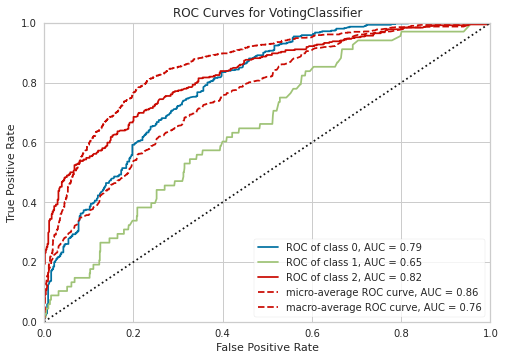

In [21]:
plot_model(blender)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


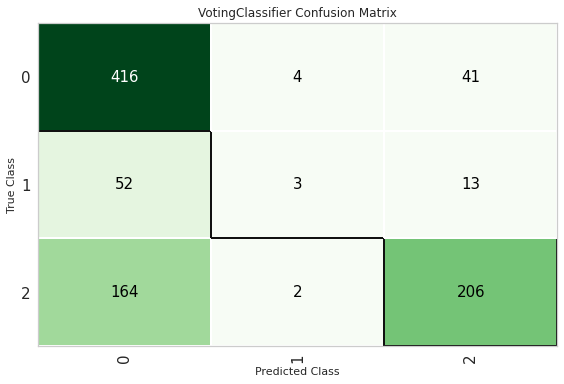

In [22]:
plot_model(blender, plot = 'confusion_matrix')

In [23]:
evaluate_model(blender)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [24]:
best = automl(optimize = 'AUC')
best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [25]:
pred_holdouts = predict_model(blender)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.6937,0.7948,0.5001,0.6891,0.6645,0.4123,0.4399


,construction_year,gps_height,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,ward_Akheri,ward_Badi,ward_Balangidalalu,...,subvillage_Zahani,subvillage_Zaire,subvillage_Zambia,subvillage_Zingibali,subvillage_Zobogo,subvillage_Zomba A,subvillage_Zombengalawa,status_group,Label,Score
0,1980.0,874.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,functional,functional,0.7627
1,1997.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,functional,functional,0.6855
2,2000.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non functional,functional,0.9180
3,1996.0,1179.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non functional,non functional,0.9505
4,1995.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non functional,non functional,0.5525


In [26]:
predict_test = predict_model(best, data = Test)
predict_test

,quantity,construction_year,ward,waterpoint_type,funder,lga,subvillage,gps_height,Label,Score
0,seasonal,2012,Bashay,other,Dmdd,Mbulu,Magoma,1996,functional,0.57
1,insufficient,2000,Kimnyaki,communal standpipe,Government Of Tanzania,Arusha Rural,Kimnyak,1569,functional,0.59
2,insufficient,2010,Puma,other,Government Of Tanzania,Singida Rural,Msatu,1567,non functional,0.59
3,dry,1987,Mkutano,other,Finn Water,Liwale,Kipindimbi,267,non functional,1.00
4,enough,2000,Mbinga Urban,communal standpipe,Bruder,Mbinga,Losonga,1260,functional,0.60
...,...,...,...,...,...,...,...,...,...,...
14845,enough,1988,Yombo,communal standpipe,Danida,Bagamoyo,Yombo,34,functional,0.70
14846,insufficient,1994,Mvungwe,hand pump,Hiap,Kilindi,Mkondoa,0,functional,0.75
14847,insufficient,2010,Ughandi,communal standpipe,Government Of Tanzania,Singida Rural,Juhudi,1476,functional,0.81
14848,insufficient,2009,Maposeni,communal standpipe,Germany,Songea Rural,Namakinga B,998,functional,0.77


In [28]:
submission = predict_test[['id','Label']]
submission = submission.rename(columns={'Label': 'status_group'})
submission.to_csv("submission.csv")

In [ ]:
save_model(best, model_name='best-model1')

In [ ]:
loaded_bestmodel = load_model('best-model1')

In [ ]:
#!pip install scikit-learn==0.23.2

In [46]:
Train_data = Train.iloc[:,:-1]
Train_target = Train.iloc[:,-1]


In [41]:
Train_data
Train_target

0            functional
1            functional
2            functional
3        non functional
4            functional
              ...      
59395        functional
59396        functional
59397        functional
59398        functional
59399        functional
Name: status_group, Length: 59400, dtype: object

In [22]:
from sklearn.model_selection import train_test_split

In [47]:
 X_train, X_test, y_train, y_test = train_test_split(Train_data, Train_target, test_size=0.33)


In [53]:
Train_pycaret = pd.DataFrame[X_train,y_train]


TypeError: 'type' object is not subscriptable

In [49]:
Train_pycaret.head()

AttributeError: 'list' object has no attribute 'head'

In [2]:
clf1 = setup(Train, target = 'status_group', session_id=123, log_experiment=True, experiment_name='pump')

NameError: name 'setup' is not defined